# **PCLab#4** - Group 10 - Clement Guyot de la Pommeraye, Erik van der Sangen, Jacopo Cagnacci, Giacomo Bellodi

* **Time spent**: 4hrs x team member
* **Level of difficulty**: 8.5/10



## Import Libraries


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress
import matplotlib.dates as mdates

## **Task 1**: Basic manipulation and descriptive statistics

In [19]:
price = pd.read_csv("/content/Data_PCLab4_Stock_Price.csv")
volume = pd.read_csv("/content/Data_PCLab4_Stock_Volume.csv")

In [20]:
price

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [21]:
print(f"The average trading volume of Apple over the period is: {int(volume["AAPL"].mean())}")
print(f"The maximum trading volume of the S&P500 over the period is: {int(volume["sp500"].max())}")


The average trading volume of Apple over the period is: 58203317
The maximum trading volume of the S&P500 over the period is: 9044690000


In [22]:
volume_analysis = volume.drop(columns=['Date', 'sp500'])
price_analysis = price.drop(columns=['Date', 'sp500'])
priced_volume_analysis = volume_analysis * price_analysis

sum_volume = volume_analysis.sum()
mean_volume = volume_analysis.mean()
median_volume = volume_analysis.median()
mean_price = price_analysis.mean()
sum_priced_volume = priced_volume_analysis.sum()

volume_summary = pd.DataFrame({
    'Total Volume': sum_volume,
    'Mean Volume': mean_volume,
    'Median Volume': median_volume,
    'Mean Price': mean_price,
    'Priced Volume': sum_priced_volume
})

volume_summary.sort_values(by='Total Volume', ascending=False, inplace=True)

print("Summary of volume for each stock:")
display(volume_summary)

Summary of volume for each stock:


,Total Volume,Mean Volume,Median Volume,Mean Price,Priced Volume
AAPL,125660962300,5.820332e+07,42094200.0,140.819823,1.451070e+13
T,61145716000,2.832131e+07,24859300.0,35.162899,2.120146e+12
MGM,21256610900,9.845582e+06,7899800.0,23.105743,4.587823e+11
TSLA,15115811600,7.001302e+06,5581100.0,259.600815,5.139188e+12
BA,13860598500,6.419916e+06,3991000.0,189.942700,2.562211e+12
IBM,9614220300,4.453090e+06,3825000.0,161.853001,1.533988e+12
AMZN,8857670800,4.102673e+06,3494800.0,915.665665,8.690458e+12
GOOG,5393696400,2.498238e+06,1813900.0,783.712512,3.531871e+12


Apple is by far the most actively traded stock, both in terms of total volume and in its mean and median trading volumes over the period. However, since trading volume does not account for differences in share prices, it is also useful to consider the average price of each stock. When adjusting for price, Apple remains the most traded company, but the gap narrows considerably. For example, Amazon had the second-lowest absolute trading volume, about 14 times lower than Apple’s, yet this difference falls to only 1.7 times when adjusted for stock price.

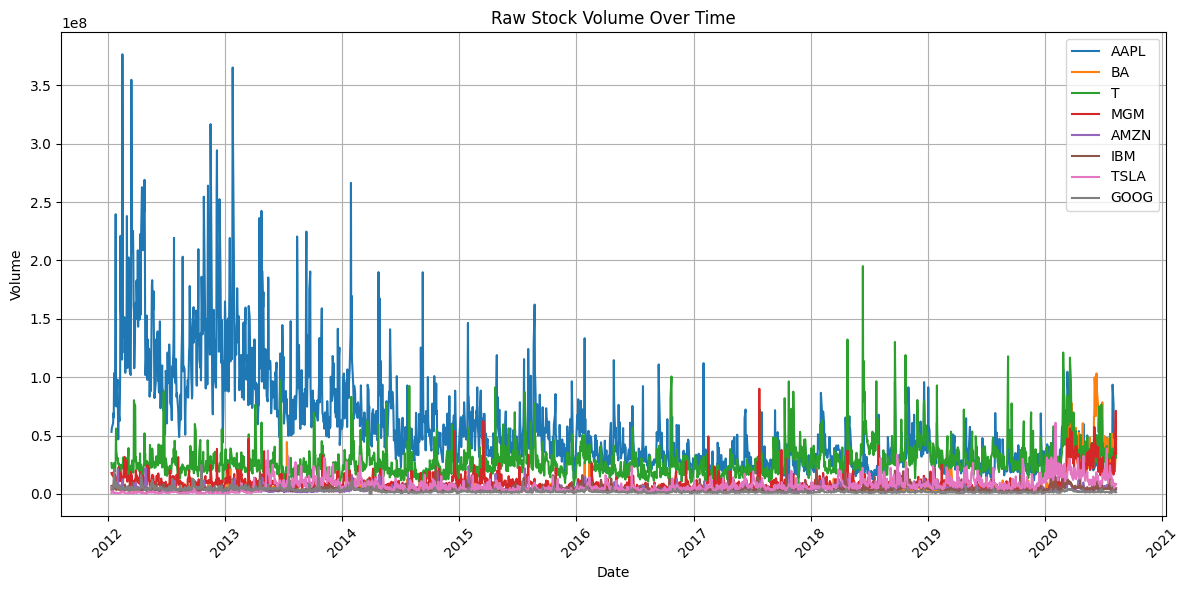

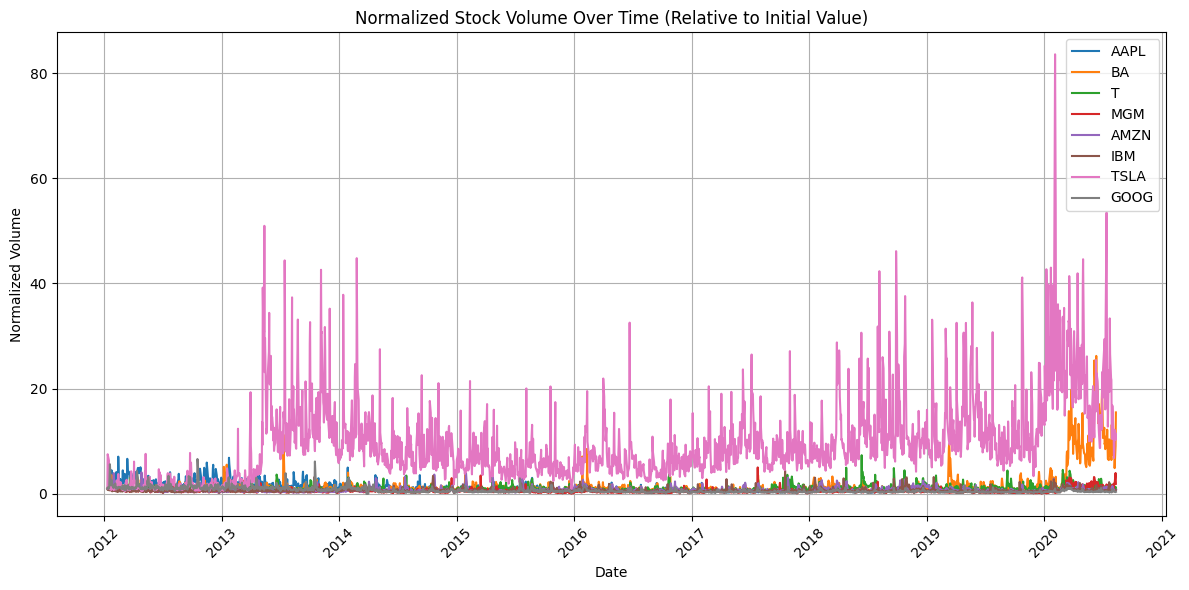

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Drop 'sp500' for plotting and set 'Date' as index
volume_plotting = volume.drop(columns=['sp500']).set_index('Date')

# Convert the index to datetime objects for proper date plotting
volume_plotting.index = pd.to_datetime(volume_plotting.index)


# Plot raw volume
fig, ax = plt.subplots(figsize=(12, 6))
for column in volume_plotting.columns:
    ax.plot(volume_plotting.index, volume_plotting[column], label=column)
ax.set_title('Raw Stock Volume Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.legend()
ax.grid(True)

# Set x-axis major locator to yearly intervals
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Normalize volume to the initial value
normalized_volume = volume_plotting / volume_plotting.iloc[0]

# Plot normalized volume
fig, ax = plt.subplots(figsize=(12, 6))
for column in normalized_volume.columns:
    ax.plot(normalized_volume.index, normalized_volume[column], label=column)
ax.set_title('Normalized Stock Volume Over Time (Relative to Initial Value)')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Volume')
ax.legend()
ax.grid(True)

# Set x-axis major locator to yearly intervals
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

At the beginning of the period, Apple shares were the most actively traded, while by the end, AT&T had become the most traded stock. When examining the normalized number of shares, Tesla shows the strongest growth, increasing more than fortyfold between 2012 and 2013. This sharp rise reflects the company’s relatively recent IPO in 2010. Interestingly, the data also reveal the impact of COVID-19 on Boeing’s trading activity, which surged significantly from the second quarter of 2020 onward.

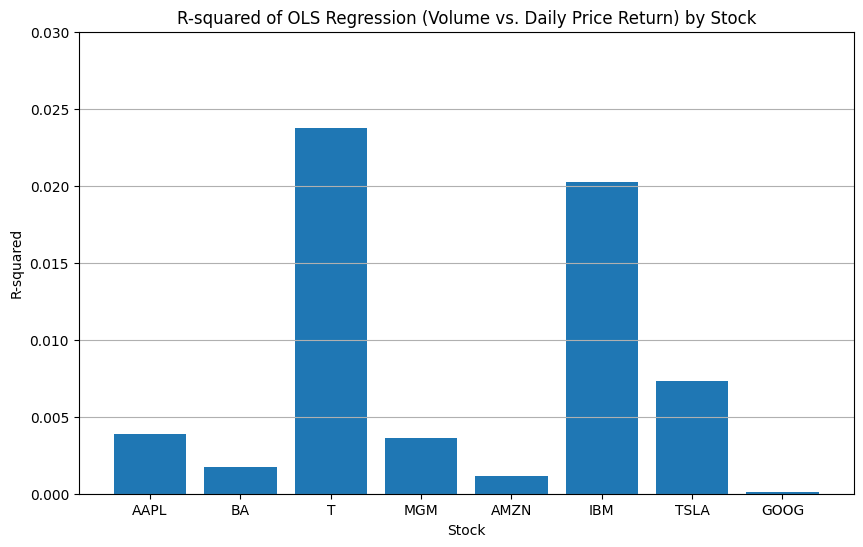

In [24]:
# Recompute R-squared values and plot in a bar chart
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Calculate daily price return
price_return = price.set_index('Date').pct_change().dropna()

# Drop 'sp500' from both dataframes and align them by date
volume_aligned = volume.drop(columns=['sp500']).set_index('Date').loc[price_return.index]
price_return_aligned = price_return.drop(columns=['sp500'])

# Convert volume to millions
volume_aligned_millions = volume_aligned / 1_000_000

# Dictionary to store R-squared values
r_squared_values = {}

# Perform OLS regression for each stock and store R-squared
for stock in volume_aligned_millions.columns:
    X = sm.add_constant(volume_aligned_millions[stock]) # Add a constant for the intercept
    model = sm.OLS(price_return_aligned[stock], X)
    results = model.fit()
    r_squared_values[stock] = results.rsquared

# Plot the R-squared values in a bar chart
stocks = list(r_squared_values.keys())
r_squared_values_list = list(r_squared_values.values())

plt.figure(figsize=(10, 6))
plt.bar(stocks, r_squared_values_list)
plt.title('R-squared of OLS Regression (Volume vs. Daily Price Return) by Stock')
plt.xlabel('Stock')
plt.ylabel('R-squared')
plt.ylim(0, 0.03) # Set a reasonable y-limit based on the observed R-squared values
plt.grid(axis='y')
plt.show()

None of the correlations are statistically significant for any of the stocks, with a maximum R² of only 0.025. Therefore, no clear relationship can be established between returns and trading volume.

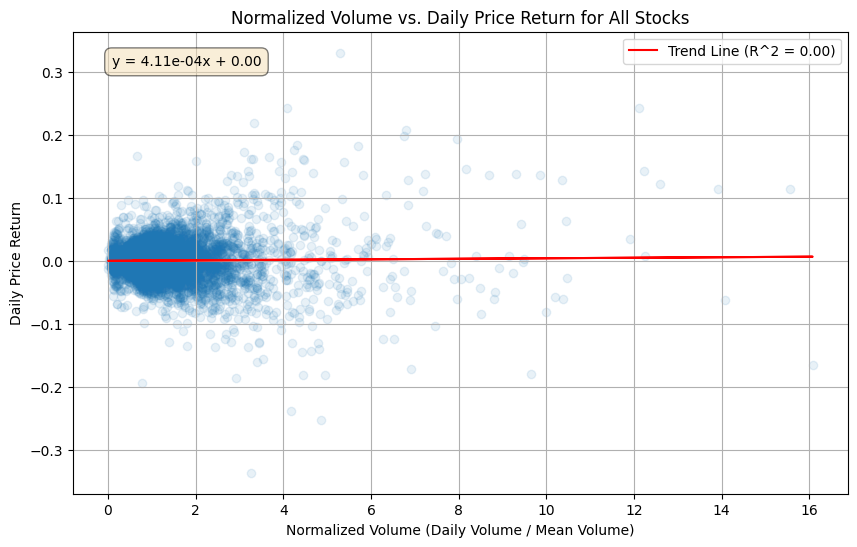

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Calculate daily price return
price_return = price.set_index('Date').pct_change().dropna()

# Drop 'sp500' from both dataframes and align them by date
volume_aligned = volume.drop(columns=['sp500']).set_index('Date').loc[price_return.index]
price_return_aligned = price_return.drop(columns=['sp500'])

# Calculate the mean volume for each stock
mean_volume = volume_aligned.mean()

# Normalize volume for each stock by dividing by its mean volume
normalized_volume = volume_aligned / mean_volume

# Combine the normalized volume and price return data for all stocks
combined_data = pd.DataFrame({
    'Normalized Volume': normalized_volume.values.flatten(),
    'Price Return': price_return_aligned.values.flatten()
})

# Plot normalized volume vs. price return for all stocks
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Normalized Volume'], combined_data['Price Return'], alpha=0.1)

# Perform OLS regression on the combined data
X_combined = sm.add_constant(combined_data['Normalized Volume']) # Add a constant for the intercept
model_combined = sm.OLS(combined_data['Price Return'], X_combined)
results_combined = model_combined.fit()

# Add trend line for the combined data
x_combined = np.array(combined_data['Normalized Volume'])
plt.plot(x_combined, results_combined.predict(X_combined), color='red', label=f'Trend Line (R^2 = {results_combined.rsquared:.2f})')

# Add equation of the OLS for the combined data
equation_combined = f'y = {results_combined.params.iloc[1]:.2e}x + {results_combined.params.iloc[0]:.2f}'
plt.text(0.05, 0.95, equation_combined, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.title('Normalized Volume vs. Daily Price Return for All Stocks')
plt.xlabel('Normalized Volume (Daily Volume / Mean Volume)')
plt.ylabel('Daily Price Return')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Similarly, when considering all stocks together and normalizing trading volume by expressing daily volume as a proportion of the mean volume for each stock, no relationship is found between returns and trading activity. This suggests that investors tend to trade more of a particular stock regardless of whether the news is “good” or “bad.”

# **TASK 2**

### **Horizons and Models Choices**
Following the guidance to focus on a single horizon for Task 2 (LPM), we pre-specified 5 trading days and ran all baseline linear models at that horizon only. After establishing the short-horizon baseline, we extended the analysis to 20 and 60 days only for the higher-capacity models (Random Forest and Neural Networks), because the literature (e.g., Gu, Kelly & Xiu, 2020) shows that non-linear models can benefit from slightly longer horizons and richer structures.



## **Task 2**: Train and Test samples + Ridge regression



In [26]:
from sklearn.preprocessing import MinMaxScaler
# Add suffixes to distinguish price and volume columns
prices = price.add_suffix('_price')
volumes = volume.add_suffix('_volume')

# Rename the date columns (they become 'Date_price' and 'Date_volume')
prices = prices.rename(columns={'Date_price': 'Date'})
volumes = volumes.rename(columns={'Date_volume': 'Date'})

# Merge on the 'Date' column
df = pd.merge(prices, volumes, on='Date')


In [27]:
# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply scaling to all numeric columns
df_scaled = df.copy()
df_scaled[df.columns[1:]] = scaler.fit_transform(df.iloc[:, 1:])

# Check results
df_scaled.head()


,Date,AAPL_price,BA_price,T_price,MGM_price,AMZN_price,IBM_price,TSLA_price,GOOG_price,sp500_price,AAPL_volume,BA_volume,T_volume,MGM_volume,AMZN_volume,IBM_volume,TSLA_volume,GOOG_volume,sp500_volume
0,2012-01-12,0.011026,0.022149,0.200599,0.161541,0.000000,0.708750,0.003370,0.027258,0.008282,0.114426,0.030712,0.104392,0.190027,0.196063,0.194148,0.006016,0.150441,0.355442
1,2012-01-13,0.010462,0.019712,0.197605,0.168663,0.000817,0.697265,0.000000,0.025463,0.005242,0.123624,0.037610,0.080939,0.175788,0.168541,0.139474,0.084781,0.185178,0.313429
2,2012-01-17,0.012209,0.021426,0.208383,0.165426,0.001879,0.704206,0.002352,0.026849,0.007414,0.135177,0.028423,0.088395,0.162989,0.207323,0.164193,0.070768,0.153180,0.354236
3,2012-01-18,0.013785,0.020944,0.213174,0.180965,0.004431,0.713046,0.002481,0.028521,0.014231,0.158381,0.033201,0.080505,0.195596,0.286932,0.116311,0.014780,0.221710,0.365226
4,2012-01-19,0.013299,0.022283,0.218563,0.183231,0.006074,0.708502,0.002450,0.031093,0.017295,0.148076,0.044993,0.099148,0.146636,0.270501,0.251703,0.014551,0.506604,0.412653


## Linear Probability Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Target: 20-day forward return binary (exclude sp500)
px = price.set_index('Date').copy()
stocks = [c for c in px.columns if c != 'sp500']
ret_5d = (px[stocks].shift(-5) - px[stocks]) / px[stocks]
target = (ret_5d > 0).astype(int)  # 1 if positive, else 0

# Features: scaled price/volume
F = (
    df_scaled.set_index('Date')
    .filter(regex='_price|_volume')
    .drop(columns=['sp500_price', 'sp500_volume'])
)

# Long format features
def cols_for(s):
    return [f'{s}_price', f'{s}_volume']

long_feats = []
for s in stocks:
    sub = F[cols_for(s)].rename(columns={
        f'{s}_price': 'price_scaled',
        f'{s}_volume': 'volume_scaled'
    })
    sub['Stock'] = s
    long_feats.append(sub)

features_long = pd.concat(long_feats).reset_index()  # Date, price_scaled, volume_scaled, Stock

# Target long
# Create 'Stock' column from index level 1 after stacking
target_long = target.stack().rename('y').reset_index()  # Date, level_1, y
target_long = target_long.rename(columns={'level_1': 'Stock'}) # Rename level_1 to Stock

# Merge & clean
data = features_long.merge(target_long, on=['Date', 'Stock']).dropna()
data = data.sort_values('Date')

# Train/Test split keeping chronoligical order (75% train, 25% test)
split = int(0.75 * len(data))
train, test = data.iloc[:split], data.iloc[split:]

X_train = train[['price_scaled', 'volume_scaled']].values
y_train = train['y'].values
X_test  = test[['price_scaled', 'volume_scaled']].values
y_test  = test['y'].values

# Linear Probability Model (LPM)
lpm = LinearRegression()
lpm.fit(X_train, y_train)

y_prob = lpm.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)        # threshold at 0.5

acc_overall = accuracy_score(y_test, y_pred)
print(f"LPM accuracy (pooled, own price/volume): {acc_overall:.3f}")

# Per-stock accuracy
test_eval = test.assign(y_pred=y_pred)
per_stock_acc = (
    test_eval.groupby('Stock')
             .apply(lambda g: accuracy_score(g['y'], g['y_pred']))
             .sort_values(ascending=False)
)

print("\nPer-stock accuracy (LPM):")
for s, a in per_stock_acc.items():
    print(f"- {s}: {a:.3f}")

LPM accuracy (pooled, own price/volume): 0.560

Per-stock accuracy (LPM):
- AAPL: 0.657
- TSLA: 0.604
- GOOG: 0.590
- AMZN: 0.565
- T: 0.552
- IBM: 0.543
- MGM: 0.501
- BA: 0.465


/tmp/ipython-input-3788370928.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: accuracy_score(g['y'], g['y_pred']))


## Ridge Regression

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score
import numpy as np


# Define a list of different alpha (penalty term) values to experiment with
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Dictionary to store accuracy results
results = {'Model': ['Linear Probability Model'], 'Accuracy': [acc_overall]} # Include the already calculated LPM accuracy

# Train and Evaluate Ridge Models
for alpha in alpha_values:
    # Train Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_prob_ridge = ridge_model.predict(X_test)

    # Classify: positive if prob > 0.5
    y_pred_ridge = (y_pred_prob_ridge > 0.5).astype(int)

    # Calculate accuracy
    accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

    # Store results
    results['Model'].append(f'Ridge (alpha={alpha})')
    results['Accuracy'].append(accuracy_ridge)

# Create a table to compare results
results_df = pd.DataFrame(results)

print("Model Performance Comparison:")
display(results_df)

Model Performance Comparison:


,Model,Accuracy
0,Linear Probability Model,0.559518
1,Ridge (alpha=0.001),0.559518
2,Ridge (alpha=0.01),0.559518
3,Ridge (alpha=0.1),0.559518
4,Ridge (alpha=1.0),0.559287
5,Ridge (alpha=10.0),0.561139
6,Ridge (alpha=100.0),0.564382


In [31]:
# Calculate OOS R-squared for a given model
def oos_r_squared(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (numerator / denominator)

# Calculate OOS R-squared for LPM
oos_r2_lpm = oos_r_squared(y_test, y_prob)
print(f"OOS R-squared (LPM): {oos_r2_lpm:.3f}")

# Calculate OOS R-squared for each Ridge model
oos_r2_ridge = {}
for alpha in alpha_values:
    # Need to re-predict for each Ridge model as y_pred_prob_ridge was overwritten in the loop
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_prob_ridge = ridge_model.predict(X_test)
    oos_r2_ridge[f'Ridge (alpha={alpha})'] = oos_r_squared(y_test, y_pred_prob_ridge)
    print(f"OOS R-squared (Ridge, alpha={alpha}): {oos_r2_ridge[f'Ridge (alpha={alpha})']:.3f}")

# Calculate ROOS (Relative OOS R-squared)
# ROOS = (OOS R^2 of model - OOS R^2 of benchmark) / (1 - OOS R^2 of benchmark)
# Let's use LPM as the benchmark for ROOS calculation for Ridge models

roos_ridge_vs_lpm = {}
for model_name, oos_r2 in oos_r2_ridge.items():
    roos_ridge_vs_lpm[f'{model_name} vs LPM'] = (oos_r2 - oos_r2_lpm) / (1 - oos_r2_lpm)

print("\nRelative OOS R-squared (ROOS) vs LPM:")
for model_name, roos in roos_ridge_vs_lpm.items():
    print(f"- {model_name}: {roos:.4f}")

OOS R-squared (LPM): 0.001
OOS R-squared (Ridge, alpha=0.001): 0.001
OOS R-squared (Ridge, alpha=0.01): 0.001
OOS R-squared (Ridge, alpha=0.1): 0.001
OOS R-squared (Ridge, alpha=1.0): 0.001
OOS R-squared (Ridge, alpha=10.0): 0.001
OOS R-squared (Ridge, alpha=100.0): 0.001

Relative OOS R-squared (ROOS) vs LPM:
- Ridge (alpha=0.001) vs LPM: 0.0000
- Ridge (alpha=0.01) vs LPM: 0.0000
- Ridge (alpha=0.1) vs LPM: 0.0000
- Ridge (alpha=1.0) vs LPM: 0.0000
- Ridge (alpha=10.0) vs LPM: 0.0000
- Ridge (alpha=100.0) vs LPM: 0.0002


**Interpretation of ROOS:**

*   A positive ROOS indicates that the model outperforms the benchmark (LPM in this case) in terms of out-of-sample R-squared.
*   A negative ROOS indicates that the model performs worse than the benchmark.
*   A ROOS close to zero suggests similar out-of-sample performance between the model and the benchmark.

Based on the calculated OOS R-squared and ROOS values:

*   The **OOS R-squared for both the LPM and all Ridge models are very close to zero (around 0.001)**. This means that neither model is explaining a significant amount of the variance in the 5-day positive return in the test set. Their predictions are not much better than simply predicting the average positive return.
*   The **Relative OOS R-squared (ROOS) for all Ridge models compared to the LPM are also very close to zero (around 0.000)**. This indicates that the Ridge regularization is not providing a noticeable improvement in out-of-sample predictive performance over the standard Linear Probability Model for this dataset and feature set.

In conclusion, these results suggest that a simple linear relationship between the previous day's scaled price and volume and the 5-day forward positive return is weak, and these models are not effective at capturing it.

# Addditional Evaluation Metrics

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Calculate Precision, Recall, F1-score, and Accuracy for the Linear Probability Model
precision_lpm = precision_score(y_test, y_pred)
recall_lpm = recall_score(y_test, y_pred)
f1_lpm = f1_score(y_test, y_pred)
accuracy_lpm = accuracy_score(y_test, y_pred)


# Calculate Precision, Recall, F1-score, and Accuracy for the best Ridge Model (alpha=100.0)
# Need to re-predict for the Ridge model with alpha=100.0 as y_pred_ridge was overwritten
ridge_model_best = Ridge(alpha=100.0)
ridge_model_best.fit(X_train, y_train)
y_pred_prob_ridge_best = ridge_model_best.predict(X_test)
y_pred_ridge_best = (y_pred_prob_ridge_best > 0.5).astype(int)

precision_ridge = precision_score(y_test, y_pred_ridge_best)
recall_ridge = recall_score(y_test, y_pred_ridge_best)
f1_ridge = f1_score(y_test, y_pred_ridge_best)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_best)

# Create a table to compare results
results_metrics = pd.DataFrame({
    'Model': ['Linear Probability Model', 'Ridge (alpha=100.0)'],
    'Accuracy': [accuracy_lpm, accuracy_ridge],
    'Precision': [precision_lpm, precision_ridge],
    'Recall': [recall_lpm, recall_ridge],
    'F1-score': [f1_lpm, f1_ridge]
})

print("Model Performance Comparison (Accuracy, Precision, Recall, F1-score):")
display(results_metrics)

Model Performance Comparison (Accuracy, Precision, Recall, F1-score):


,Model,Accuracy,Precision,Recall,F1-score
0,Linear Probability Model,0.559518,0.560671,0.970930,0.710854
1,Ridge (alpha=100.0),0.564382,0.561551,0.998339,0.718792


**Interpretation of Model Performance:**
Looking at the performance metrics, both the Linear Probability Model and the Ridge Regression model with alpha = 100.0 show similar overall accuracy (around 56%). This suggests that for this dataset and feature set, adding L2 regularization with this alpha value does not significantly improve the overall ability to correctly classify whether the 5-days forward return will be positive or negative.

However, it's important to consider other metrics beyond just accuracy, especially in a financial context:

* Precision: This measures the proportion of positive predictions that were actually correct. In finance, high precision is crucial for avoiding false positives – predicting a positive return when the actual return is negative. A low precision could lead to making trades that result in losses.

* Recall: This measures the proportion of actual positive returns that were correctly identified by the model. High recall is important for capturing as many profitable opportunities as possible. A low recall means missing out on potential gains.

* F1-score: This is the harmonic mean of precision and recall, providing a single metric that balances both. It's useful when you want to consider both false positives and false negatives.

In this case, both models have very high recall (close to 1), meaning they are good at identifying most of the times when there is a positive return. However, their precision is much lower (around 0.56). This indicates that while they capture most of the positive return instances, a significant portion of their positive predictions are incorrect. In a trading scenario, this could mean making many trades that are not profitable.

The very high recall is quite remarkable and may suggest that the model is classifying nearly all observations as having a positive 5-day forward return. This behavior can occur when the decision threshold (often 0.5 by default) is not well-calibrated for an imbalanced dataset, or when the model fails to distinguish meaningfully between positive and negative outcomes. Essentially, the model avoids missing any potential positives (hence the recall near 1) but at the cost of producing many false positives, leading to a drop in precision. Exploring the predicted probability distribution or adjusting the classification threshold could provide more balanced performance.

The F1-scores are moderate, reflecting the imbalance between high recall and lower precision.

The minimal difference in these alternative metrics between the LPM and the best Ridge model further supports the conclusion from the OOS R-squared analysis that the Ridge regularization, with the tested alpha values, is not providing a substantial improvement in predictive power for this specific task.


## **Task 2bis**: Improving the model?



In [33]:
#FIXED LOOP: MARKET RETURNS (S&P 500) & STOCK RETURN LAGS (t-1, t-2, ..., t-k)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# make long tables for scaled price/volume with clean 'Stock' tickers
def make_price_long(df_scaled):
    # Keep only *_price columns except the market
    price_cols = [c for c in df_scaled.columns if c.endswith('_price') and c != 'sp500_price']
    price_wide = df_scaled[['Date'] + price_cols].set_index('Date')
    price_long = price_wide.stack().reset_index()
    price_long.columns = ['Date', 'col', 'price_scaled']
    # Strip the '_price' suffix to get clean ticker names
    price_long['Stock'] = price_long['col'].str.replace('_price', '', regex=False)
    price_long = price_long.drop(columns=['col'])
    return price_long

def make_volume_long(df_scaled):
    vol_cols = [c for c in df_scaled.columns if c.endswith('_volume') and c != 'sp500_volume']
    vol_wide = df_scaled[['Date'] + vol_cols].set_index('Date')
    vol_long = vol_wide.stack().reset_index()
    vol_long.columns = ['Date', 'col', 'volume_scaled']
    # Strip the '_volume' suffix to get clean ticker names
    vol_long['Stock'] = vol_long['col'].str.replace('_volume', '', regex=False)
    vol_long = vol_long.drop(columns=['col'])
    return vol_long

#  Prepare static long bases once (faster than rebuilding every loop)
price_long_scaled = make_price_long(df_scaled)
volume_long_scaled = make_volume_long(df_scaled)
features_long_base = price_long_scaled.merge(volume_long_scaled, on=['Date', 'Stock'], how='inner')

# Define different lag configurations to test
lag_configurations = [
    [1],
    [1, 2],     # Use lags t-1 and t-2 (original configuration)
    [1, 2, 3],  # Use lags t-1, t-2, and t-3
]

all_results = []

for lags_to_use in lag_configurations:
    print(f"\n--- Evaluating models with lags: {lags_to_use} ---")

    # 1) Market returns from S&P 500 at t and t-1 (known at time t)
    mkt = px['sp500'].copy()
    mkt_ret_t   = mkt.pct_change(1)     # ΔP_M,t
    mkt_ret_tm1 = mkt_ret_t.shift(1)    # ΔP_M,t-1

    market_ret_feats = (
        pd.concat([
            mkt_ret_t.rename('mkt_ret_lag1'),
            mkt_ret_tm1.rename('mkt_ret_lag2')
        ], axis=1)
        .reset_index()                  # Date, mkt_ret_lag1, mkt_ret_lag2
    )

    # 2) Stock-specific return lags (t-1, ..., t-k) + current day return ΔP_i,t
    stock_ret_1 = px[stocks].pct_change(1)   # ΔP_i,t (at t)

    # Build a long table with the selected lags
    stock_ret_lags_list = []
    for lag in lags_to_use:
        # ret_lag{lag} = ΔP_i,t-lag
        tmp = (
            stock_ret_1.shift(lag)
            .stack()
            .rename(f'ret_lag{lag}')
            .reset_index()
            .rename(columns={'level_1': 'Stock'})
        )
        stock_ret_lags_list.append(tmp)

    # Start with the first lag frame, then merge others on ['Date','Stock']
    ret_long_current_lags = stock_ret_lags_list[0]
    for i in range(1, len(stock_ret_lags_list)):
        ret_long_current_lags = ret_long_current_lags.merge(
            stock_ret_lags_list[i], on=['Date', 'Stock'], how='left'
        )

    # Add current-day return explicitly (ΔP_i,t)
    current_ret_long = (
        stock_ret_1
        .stack()
        .rename('ret_lag1_current')
        .reset_index()
        .rename(columns={'level_1': 'Stock'})
    )
    ret_long_current_lags = ret_long_current_lags.merge(
        current_ret_long, on=['Date', 'Stock'], how='left'
    )

    # 3) Merge NEW features into base (scaled price/volume) + market returns
    features_long_current = (
        features_long_base
        .merge(ret_long_current_lags, on=['Date', 'Stock'], how='left')
        .merge(market_ret_feats, on='Date', how='left')
    )

    # 4) Build dataset (merge with target; all lags ≤ t, no look-ahead)
    data_current = (
        features_long_current
        .merge(target_long, on=['Date', 'Stock'], how='inner')
        .dropna()
        .sort_values('Date')
    )

    # 5) Train/Test split (chronological)
    split_current = int(0.75 * len(data_current))
    train_current, test_current = data_current.iloc[:split_current], data_current.iloc[split_current:]

    # 6) Feature matrix: price/volume + selected own lags + market returns
    feat_cols_current = (
        ['price_scaled', 'volume_scaled', 'ret_lag1_current'] +
        [f'ret_lag{lag}' for lag in lags_to_use] +
        ['mkt_ret_lag1', 'mkt_ret_lag2']
    )

    # Be defensive: only keep columns that exist
    feat_cols_current = [c for c in feat_cols_current if c in train_current.columns]
    missing_cols = set(['price_scaled', 'volume_scaled', 'mkt_ret_lag1', 'mkt_ret_lag2']) - set(feat_cols_current)
    if missing_cols:
        print(f"Warning: missing required features {sorted(missing_cols)}; continuing with available columns.")

    X_train_current = train_current[feat_cols_current].values
    y_train_current = train_current['y'].values
    X_test_current  = test_current[feat_cols_current].values
    y_test_current  = test_current['y'].values

    # 7) LPM
    lpm_current = LinearRegression().fit(X_train_current, y_train_current)
    y_prob_current_lpm = lpm_current.predict(X_test_current)
    y_pred_current_lpm = (y_prob_current_lpm > 0.5).astype(int)

    acc_overall_lpm_current = accuracy_score(y_test_current, y_pred_current_lpm)
    precision_lpm_current = precision_score(y_test_current, y_pred_current_lpm, zero_division=0)
    recall_lpm_current = recall_score(y_test_current, y_pred_current_lpm, zero_division=0)
    f1_lpm_current = f1_score(y_test_current, y_pred_current_lpm, zero_division=0)
    oos_r2_lpm_current = oos_r_squared(y_test_current, y_prob_current_lpm)

    # 8) Ridge: pick best alpha by accuracy (you can switch to F1 if preferred)
    alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    best_ridge_acc = -1.0
    best_ridge_alpha = None
    y_prob_current_ridge_best = None

    for a in alpha_values:
        ridge_current = Ridge(alpha=a).fit(X_train_current, y_train_current)
        y_pred_prob_r_current = ridge_current.predict(X_test_current)
        y_pred_r_current = (y_pred_prob_r_current > 0.5).astype(int)
        current_acc = accuracy_score(y_test_current, y_pred_r_current)
        if current_acc > best_ridge_acc:
            best_ridge_acc = current_acc
            best_ridge_alpha = a
            y_prob_current_ridge_best = y_pred_prob_r_current

    # Metrics for best Ridge
    y_pred_current_ridge_best_cls = (y_prob_current_ridge_best > 0.5).astype(int)
    precision_ridge_current = precision_score(y_test_current, y_pred_current_ridge_best_cls, zero_division=0)
    recall_ridge_current = recall_score(y_test_current, y_pred_current_ridge_best_cls, zero_division=0)
    f1_ridge_current = f1_score(y_test_current, y_pred_current_ridge_best_cls, zero_division=0)
    oos_r2_ridge_current = oos_r_squared(y_test_current, y_prob_current_ridge_best)

    # 9) Store results
    all_results.append({
        'Lags': str(lags_to_use),
        'Model': 'LPM',
        'Accuracy': acc_overall_lpm_current,
        'Precision': precision_lpm_current,
        'Recall': recall_lpm_current,
        'F1-score': f1_lpm_current,
        'OOS R-squared': oos_r2_lpm_current
    })
    all_results.append({
        'Lags': str(lags_to_use),
        'Model': f'Ridge (alpha={best_ridge_alpha})',
        'Accuracy': best_ridge_acc,
        'Precision': precision_ridge_current,
        'Recall': recall_ridge_current,
        'F1-score': f1_ridge_current,
        'OOS R-squared': oos_r2_ridge_current
    })

# 10) Combined results
results_df_all_lags = pd.DataFrame(all_results)
print("\n--- Model Performance Comparison Across Lag Configurations ---")
display(results_df_all_lags.round(4))



--- Evaluating models with lags: [1] ---

--- Evaluating models with lags: [1, 2] ---

--- Evaluating models with lags: [1, 2, 3] ---

--- Model Performance Comparison Across Lag Configurations ---


,Lags,Model,Accuracy,Precision,Recall,F1-score,OOS R-squared
0,[1],LPM,0.5568,0.5648,0.8974,0.6933,-0.0001
1,[1],Ridge (alpha=100.0),0.5642,0.5619,0.9946,0.7181,0.0007
2,"[1, 2]",LPM,0.5559,0.5647,0.8937,0.6921,0.0001
3,"[1, 2]",Ridge (alpha=100.0),0.5642,0.5622,0.9934,0.7180,0.0006
4,"[1, 2, 3]",LPM,0.5587,0.5678,0.8804,0.6903,-0.0010
5,"[1, 2, 3]",Ridge (alpha=100.0),0.5647,0.5627,0.9913,0.7179,0.0005


**Interpretation of Results with Enhanced Features:**

After incorporating the market return (S&P500) and lagged stock price changes (up to 3 lags) as features, we re-trained and evaluated the Linear Probability Model (LPM) and Ridge Regression models.

Comparing these results to the previous models that only used the current day's scaled price and volume:

*   **Accuracy:** The overall accuracy for both the LPM and Ridge models with enhanced features is similar to the previous models, remaining around 56%. This suggests that while the new features might contain some predictive information, they are not drastically improving the overall correct classification rate on their own with these linear models.
*   **OOS R-squared:** The Out-of-Sample R-squared values for both the LPM and Ridge models with enhanced features are still very close to zero (ranging from slightly negative to around 0.001). This indicates that the models are still not explaining a significant portion of the variance in the 5-day positive return in the test set, even with the added features. Their predictive power is not substantially better than simply predicting the average positive return.
*   **ROOS:** The Relative OOS R-squared (ROOS) values for the Ridge models against the enhanced LPM are also very close to zero. This implies that within this enhanced feature set, Ridge regularization is still not providing a noticeable improvement in out-of-sample predictive performance over the simple LPM.

**Comparison Summary:**

Adding the market return and lagged stock price changes as features did not lead to a significant improvement in the predictive performance of the Linear Probability Model or Ridge Regression, as measured by overall accuracy, OOS R-squared, and ROOS. The models continue to show limited ability to predict the 5-day forward positive returns based on the current set of features and linear modeling approaches.

The very high recall observed previously might still be present, suggesting the models are likely classifying a large number of instances as positive returns to minimize false negatives, which comes at the cost of precision.

These results reinforce the earlier conclusion that a simple linear relationship between these features and the 5-day forward positive return is weak.

## **Task 3**: Testing other Models






### Redundant task where we set the df in long format and compute t+x returns(needed as we splitted the work between teammates)

In [34]:


# Wide raw tables (Date index), keep only common stocks
px  = price.set_index('Date').sort_index().copy()
vol = volume.set_index('Date').sort_index().copy()

# drop market/index columns if present in volume
bad = 'sp500'
vol = vol[[c for c in vol.columns if c != bad]]

tickers = sorted(set(px.columns) & set(vol.columns))
px  = px[tickers]
vol = vol[tickers]

# Forward returns aligned at time t
horizons = (5, 20, 60)
rets = {f'ret{k}': px.pct_change(k).shift(-k) for k in horizons}

#3) Long format pieces
price_long = (
    px.stack()
      .rename('price')
      .reset_index()
      .rename(columns={'Date': 'date', 'level_1': 'stock'})
)

volume_long = (
    vol.stack()
       .rename('volume')
       .reset_index()
       .rename(columns={'Date': 'date', 'level_1': 'stock'})
)

long_df = price_long.merge(volume_long, on=['date','stock'], how='inner')

for k in horizons:
    r_long = (
        rets[f'ret{k}'].stack()
                        .rename(f'ret{k}')
                        .reset_index()
                        .rename(columns={'Date':'date','level_1':'stock'})
    )
    long_df = long_df.merge(r_long, on=['date','stock'], how='left')

#4) Clean up & order
long_df = (
    long_df
    .dropna(subset=[f'ret{k}' for k in horizons])   # last k days have no forward returns
    .sort_values(['stock','date'])
    .reset_index(drop=True)
)


long_df.head(10)


,date,stock,price,volume,ret5,ret20,ret60
0,2012-01-12,AAPL,60.198570,53146800,-0.002587,0.170934,0.491350
1,2012-01-13,AAPL,59.972858,56505400,0.018103,0.197208,0.491627
2,2012-01-17,AAPL,60.671429,60724300,-0.010101,0.199576,0.466376
3,2012-01-18,AAPL,61.301430,69197800,0.040899,0.159772,0.410431
4,2012-01-19,AAPL,61.107143,65434600,0.039462,0.174074,0.356236
5,2012-01-20,AAPL,60.042858,103493600,0.064192,0.194670,0.450630
6,2012-01-23,AAPL,61.058571,76515600,0.059896,0.204581,0.423317
7,2012-01-24,AAPL,60.058571,136909500,0.085797,0.220333,0.397303
8,2012-01-25,AAPL,63.808571,239578500,0.021336,0.156114,0.282810
9,2012-01-26,AAPL,63.518570,80996300,0.023593,0.174932,0.285788


### Add binary classification and past values features (prices and volumes)

In [35]:
#add binary classification (1 if return positive, 0 if the return is negative).

for k in (5, 20, 60):
    col = f'ret{k}'
    if col in long_df.columns:
        long_df[f'bin_{k}'] = (long_df[col] > 0).astype('int8')

#final dataframe
long_df.head(10)

,date,stock,price,volume,ret5,ret20,ret60,bin_5,bin_20,bin_60
0,2012-01-12,AAPL,60.198570,53146800,-0.002587,0.170934,0.491350,0,1,1
1,2012-01-13,AAPL,59.972858,56505400,0.018103,0.197208,0.491627,1,1,1
2,2012-01-17,AAPL,60.671429,60724300,-0.010101,0.199576,0.466376,0,1,1
3,2012-01-18,AAPL,61.301430,69197800,0.040899,0.159772,0.410431,1,1,1
4,2012-01-19,AAPL,61.107143,65434600,0.039462,0.174074,0.356236,1,1,1
5,2012-01-20,AAPL,60.042858,103493600,0.064192,0.194670,0.450630,1,1,1
6,2012-01-23,AAPL,61.058571,76515600,0.059896,0.204581,0.423317,1,1,1
7,2012-01-24,AAPL,60.058571,136909500,0.085797,0.220333,0.397303,1,1,1
8,2012-01-25,AAPL,63.808571,239578500,0.021336,0.156114,0.282810,1,1,1
9,2012-01-26,AAPL,63.518570,80996300,0.023593,0.174932,0.285788,1,1,1


In [36]:
#we add also past window features that will be then included in the model
def add_past_window_features(df: pd.DataFrame, horizons=(5, 20, 60)) -> pd.DataFrame:

    out = df.copy()
    out = out.sort_values(["stock", "date"])

    def _per_stock(g: pd.DataFrame) -> pd.DataFrame:
        g = g.copy()

        for h in horizons:
            # past returns & volume changes (t-h -> t)
            g[f"ret_past_{h}"]    = g["price"].pct_change(h)          # (P_t - P_{t-h}) / P_{t-h}
            g[f"volchg_past_{h}"] = g["volume"].pct_change(h)         # (V_t - V_{t-h}) / V_{t-h}

        return g

    out = out.groupby("stock", group_keys=False).apply(_per_stock).reset_index(drop=True)
    return out
df = add_past_window_features(long_df, horizons=(5, 20, 60))
df.head(10)

/tmp/ipython-input-4142680627.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = out.groupby("stock", group_keys=False).apply(_per_stock).reset_index(drop=True)


,date,stock,price,volume,ret5,ret20,ret60,bin_5,bin_20,bin_60,ret_past_5,volchg_past_5,ret_past_20,volchg_past_20,ret_past_60,volchg_past_60
0,2012-01-12,AAPL,60.198570,53146800,-0.002587,0.170934,0.491350,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-13,AAPL,59.972858,56505400,0.018103,0.197208,0.491627,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-17,AAPL,60.671429,60724300,-0.010101,0.199576,0.466376,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-18,AAPL,61.301430,69197800,0.040899,0.159772,0.410431,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-19,AAPL,61.107143,65434600,0.039462,0.174074,0.356236,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
5,2012-01-20,AAPL,60.042858,103493600,0.064192,0.194670,0.450630,1,1,1,-0.002587,0.947316,NaN,NaN,NaN,NaN
6,2012-01-23,AAPL,61.058571,76515600,0.059896,0.204581,0.423317,1,1,1,0.018103,0.354129,NaN,NaN,NaN,NaN
7,2012-01-24,AAPL,60.058571,136909500,0.085797,0.220333,0.397303,1,1,1,-0.010101,1.254608,NaN,NaN,NaN,NaN
8,2012-01-25,AAPL,63.808571,239578500,0.021336,0.156114,0.282810,1,1,1,0.040899,2.462227,NaN,NaN,NaN,NaN
9,2012-01-26,AAPL,63.518570,80996300,0.023593,0.174932,0.285788,1,1,1,0.039462,0.237821,NaN,NaN,NaN,NaN


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support

In [38]:
#features used to predict future returns: price and volume at time t, returns and volume change form t-h to t, where h are the 3 horizons (5, 20, 60)
feature_cols = ["price","volume",
    "ret_past_5","volchg_past_5",
    "ret_past_20","volchg_past_20",
    "ret_past_60","volchg_past_60",]

#split data chronologically: 75% train, 25 % test (keeping the same % for each stock)
def time_split_per_stock(panel: pd.DataFrame, ratio: float = 0.75):
    train_list, test_list = [], []
    for s, g in panel.groupby("stock"):
        g = g.sort_values("date")
        n = len(g)
        cut = int(np.floor(n * ratio))
        train_list.append(g.iloc[:cut].copy())
        test_list.append(g.iloc[cut:].copy())
    return pd.concat(train_list, ignore_index=True), pd.concat(test_list, ignore_index=True)

train_df, test_df = time_split_per_stock(df, ratio=0.75)

# CHECKS
print("Stocks:", df["stock"].nunique())
print("Train range:", train_df["date"].min(), "→", train_df["date"].max())
print("Test  range:", test_df["date"].min(), "→", test_df["date"].max())

Stocks: 8
Train range: 2012-01-12 → 2018-04-16
Test  range: 2018-04-17 → 2020-05-15


In [39]:

#define function for random forest classifier (no need to rescale the data)

def rf_classify_for_horizon(train_df, test_df, feature_cols, horizon):
    y_tr = train_df[f"bin_{horizon}"]
    y_te = test_df[f"bin_{horizon}"]
    X_tr = train_df[feature_cols]
    X_te = test_df[feature_cols]

    # Drop rows with any NaNs in features or y
    tr_ok = ~(X_tr.isna().any(axis=1) | y_tr.isna())
    te_ok = ~(X_te.isna().any(axis=1) | y_te.isna())
    X_tr = X_tr.loc[tr_ok].values
    y_tr = y_tr.loc[tr_ok].values
    X_te = X_te.loc[te_ok].values
    y_te = y_te.loc[te_ok].values

    clf = RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state=42,
        class_weight="balanced_subsample"
    )
    clf.fit(X_tr, y_tr)
    y_hat = clf.predict(X_te)

    metrics = {
        "horizon": horizon,
        "n_train": int(X_tr.shape[0]),
        "n_test": int(X_te.shape[0]),
        "accuracy": accuracy_score(y_te, y_hat),
        "precision": precision_score(y_te, y_hat, zero_division=0),
        "recall": recall_score(y_te, y_hat, zero_division=0),
        "f1": f1_score(y_te, y_hat, zero_division=0),
    }
    return metrics, clf

cls_results, cls_models = [], {}
for h in [5, 20, 60]:
    m, model = rf_classify_for_horizon(train_df, test_df, feature_cols, h)
    cls_results.append(m)
    cls_models[h] = model

pd.DataFrame(cls_results)


,horizon,n_train,n_test,accuracy,precision,recall,f1
0,5,12112,4200,0.534286,0.562031,0.710776,0.627712
1,20,12112,4200,0.522381,0.574484,0.637120,0.604183
2,60,12112,4200,0.600952,0.621266,0.836013,0.712817


The Random Forest classifier shows moderate predictive power across horizons.

* For the short-term (5-day) horizon, the model achieves an accuracy of ≈ 53%, only slightly above random guessing, but with precision ≈ 56% and recall ≈ 71%, suggesting it captures many positive movements (high recall) at the cost of some false positives.

* For the medium horizon (20 days), performance is similar, with slightly lower recall, implying that patterns beyond one week become harder to exploit.

* For the long horizon (60 days), both accuracy (≈ 60%) and F1 (≈ 0.71) improve noticeably. The model benefits from longer-term trends being more persistent, yielding higher recall (≈ 84%) and better overall balance between precision and recall.

We now run a Random Forest Regressor Model in order to predict the forects return given the time horizons.


In [40]:
from sklearn.ensemble import RandomForestRegressor

#map the time horizons with corresponding return columns
ret_cols = {
    5:  "ret5",
    20: "ret20",
    60: "ret60",
}

#Function to rain a Random Forest regressor to predict the forward simple return at a given horizon.
def rf_regress_for_horizon(train_df, test_df, feat_cols, horizon, random_state=42):

    # Target vectors
    y_tr = train_df[ret_cols[horizon]]
    y_te = test_df[ret_cols[horizon]]

    # Feature matrices
    X_tr = train_df[feat_cols]
    X_te = test_df[feat_cols]

    # drop any row with NaN in X or y
    tr_ok = ~(X_tr.isna().any(axis=1) | y_tr.isna())
    te_ok = ~(X_te.isna().any(axis=1) | y_te.isna())
    X_tr = X_tr.loc[tr_ok].values; y_tr = y_tr.loc[tr_ok].values
    X_te = X_te.loc[te_ok].values; y_te = y_te.loc[te_ok].values

    # Random Forest
    rfr = RandomForestRegressor(
        n_estimators=300,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state= random_state
    )
    rfr.fit(X_tr, y_tr)
    y_hat = rfr.predict(X_te)

    #compurte Roos
    sse_model = np.sum((y_te - y_hat)**2)
    sse_bench = np.sum(y_te**2) + 1e-12
    roos = 1.0 - sse_model/sse_bench

    #store results
    preds = pd.DataFrame({
        "date":  test_df.loc[te_ok, "date"].values,
        "stock": test_df.loc[te_ok, "stock"].values,
        f"r_true_{horizon}": y_te,
        f"r_hat_{horizon}":  y_hat,
    })
    return {"horizon":horizon, "n_train":int(X_tr.shape[0]), "n_test":int(X_te.shape[0]), "ROOS":roos}, rfr, preds

#run model
reg_results, reg_models, reg_preds = [], {}, {}
for h in [5,20,60]:
    m, mdl, pr = rf_regress_for_horizon(train_df, test_df, feature_cols, h)
    reg_results.append(m)
    reg_models[h] = mdl
    reg_preds[h]  = pr


reg_results = pd.DataFrame(reg_results)
reg_results


,horizon,n_train,n_test,ROOS
0,5,12112,4200,-0.088643
1,20,12112,4200,-0.206766
2,60,12112,4200,-0.029509


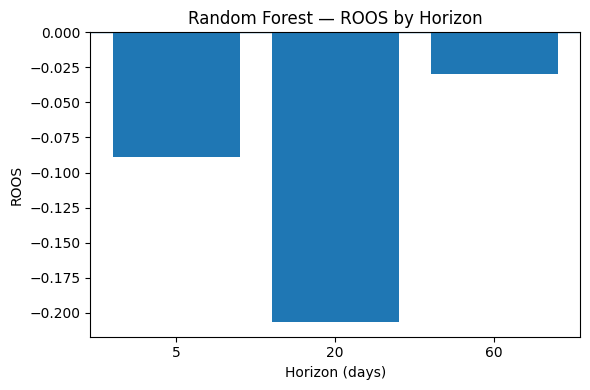

In [41]:
#plot resutls
# Bar chart
reg_results["horizon"] = reg_results["horizon"].astype(int)
reg_results = reg_results.sort_values("horizon")

# Bar chart
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(reg_results["horizon"].astype(str), reg_results["ROOS"])

# Zero line
ax.axhline(0, linewidth=1)

# Labels & title
ax.set_title("Random Forest — ROOS by Horizon")
ax.set_xlabel("Horizon (days)")
ax.set_ylabel("ROOS")


plt.tight_layout()
plt.show()


The Random Forest regression model yields negative ROOS values across all horizons. The regressor fails to generalize effectively and performs worse than assuming no movement in returns.

This outcome is consistent with well-known empirical evidence: stock returns are extremely noisy and difficult to predict in levels. While the classifier could exploit small directional patterns, the regression model struggles to capture the magnitude of future returns.

## NEURAL NETWORK (1 to 5 layers hidden layers)

In [42]:
#scale data

# Train/Test features already obtained
Xtr_all = train_df[feature_cols]
Xte_all = test_df[feature_cols]

# Fit on TRAIN rows with valid features only
tr_feat_ok = ~(Xtr_all.isna().any(axis=1))
te_feat_ok = ~(Xte_all.isna().any(axis=1))  # used later for alignment

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(Xtr_all.loc[tr_feat_ok].values)

MinMaxScaler()

In [43]:
#preprare the 5 different architectures like in the paper Gu et al.
architectures = {
    "NN1": (32,),
    "NN2": (32, 16),
    "NN3": (32, 16, 8),
    "NN4": (32, 16, 8, 4),
    "NN5": (32, 16, 8, 4, 2),
}

In [44]:
#check class balances

print(f'Num of positive returns in 5 horizon training sample:{len(train_df[train_df['bin_5'] == 0])}')
print(f'Num of negative returns in 5 horizon training sample:{len(train_df[train_df['bin_5'] == 1])}')

print(f'Num of positive returns in 20 horizon training sample:{len(train_df[train_df['bin_20'] == 0])}')
print(f'Num of negative returns in 20 horizon training sample:{len(train_df[train_df['bin_20'] == 1])}')

print(f'Num of positive returns in 60 horizon training sample:{len(train_df[train_df['bin_60'] == 0])}')
print(f'Num of negative returns in 60 horizon training sample:{len(train_df[train_df['bin_60'] == 1])}')

Num of positive returns in 5 horizon training sample:5612
Num of negative returns in 5 horizon training sample:6980
Num of positive returns in 20 horizon training sample:5316
Num of negative returns in 20 horizon training sample:7276
Num of positive returns in 60 horizon training sample:4850
Num of negative returns in 60 horizon training sample:7742


Classes are quiete imbalanced. Therefore we need to do some oversampling to tackle the problem.


In [45]:
import numpy as np
#Duplicate minority-class rows (with replacement) until classes are balanced.
def oversample_minority(X, y, random_state=42):
    y = np.asarray(y).astype(int)
    n0 = (y == 0).sum()
    n1 = (y == 1).sum()
    if n0 == 0 or n1 == 0 or n0 == n1:
        return X, y

    maj = 0 if n0 > n1 else 1
    min_ = 1 - maj
    X_maj, y_maj = X[y == maj], y[y == maj]
    X_min, y_min = X[y == min_], y[y == min_]

    rng = np.random.default_rng(random_state)
    idx = rng.integers(0, X_min.shape[0], size=(X_maj.shape[0] - X_min.shape[0],))
    X_extra = X_min[idx]
    y_extra = y_min[idx]

    X_bal = np.vstack([X_maj, X_min, X_extra])
    y_bal = np.concatenate([y_maj, y_min, y_extra])

    perm = rng.permutation(len(y_bal))
    return X_bal[perm], y_bal[perm]


In [46]:
from sklearn.neural_network import MLPClassifier

def nn_classify_for_horizon_oversampled(train_df, test_df, feat_cols, horizon, arch_name, arch, scaler, random_state=42):
    # y and X
    y_tr = train_df[f"bin_{horizon}"]
    y_te = test_df[f"bin_{horizon}"]
    X_tr_df = train_df[feat_cols]
    X_te_df = test_df[feat_cols]

    # masks (no NaNs)
    tr_ok = ~(X_tr_df.isna().any(axis=1) | y_tr.isna())
    te_ok = ~(X_te_df.isna().any(axis=1) | y_te.isna())

    # scale with MinMax (fit on train earlier)
    X_tr = scaler.transform(X_tr_df.loc[tr_ok].values)
    y_tr = y_tr.loc[tr_ok].values.astype(int)
    X_te = scaler.transform(X_te_df.loc[te_ok].values)
    y_te = y_te.loc[te_ok].values.astype(int)

    # oversample training set
    X_tr_bal, y_tr_bal = oversample_minority(X_tr, y_tr, random_state=random_state)


    #NN classifier
    clf = MLPClassifier(
        hidden_layer_sizes=arch,
        activation="relu",
        solver="adam",
        alpha=1e-3,
        learning_rate_init=5e-4,
        max_iter=600,
        early_stopping=True,
        n_iter_no_change=15,
        random_state=random_state
    )
    clf.fit(X_tr_bal, y_tr_bal)
    y_hat = clf.predict(X_te)
    p_up  = clf.predict_proba(X_te)[:, 1]

    #compute evaluation metrics
    metrics = {
        "model": arch_name,
        "horizon": horizon,
        "n_train_bal": int(X_tr_bal.shape[0]),
        "n_test": int(X_te.shape[0]),
        "accuracy": accuracy_score(y_te, y_hat),
        "precision": precision_score(y_te, y_hat, zero_division=0),
        "recall": recall_score(y_te, y_hat, zero_division=0),
        "f1": f1_score(y_te, y_hat, zero_division=0),
    }
    #store results
    preds = pd.DataFrame({
        "date":  test_df.loc[te_ok, "date"].values,
        "stock": test_df.loc[te_ok, "stock"].values,
        f"bin{horizon}_true": y_te,
        f"bin{horizon}_pred": y_hat,
        f"prob_up_{horizon}": p_up,
        "model": arch_name
    })
    return metrics, clf, preds

In [47]:
#run models

nn_cls_results, nn_cls_models, nn_cls_preds = [], {}, {}
for h in [5, 20, 60]:
    for name, arch in architectures.items():
        m, mdl, pr = nn_classify_for_horizon_oversampled(
            train_df, test_df, feature_cols, h, name, arch, scaler, random_state=42
        )
        nn_cls_results.append(m)
        nn_cls_models[(name, h)] = mdl
        nn_cls_preds[(name, h)] = pr

nn_cls_results_df = pd.DataFrame(nn_cls_results).sort_values(["horizon","model"])
nn_cls_results_df

,model,horizon,n_train_bal,n_test,accuracy,precision,recall,f1
0,NN1,5,13394,4200,0.503095,0.556037,0.498276,0.525574
1,NN2,5,13394,4200,0.514524,0.573368,0.473276,0.518536
2,NN3,5,13394,4200,0.520714,0.578038,0.490086,0.530441
3,NN4,5,13394,4200,0.515000,0.576944,0.457328,0.510219
4,NN5,5,13394,4200,0.510238,0.554093,0.580603,0.567039
5,NN1,20,13982,4200,0.508571,0.580676,0.507699,0.541741
6,NN2,20,13982,4200,0.530238,0.609582,0.497711,0.547995
7,NN3,20,13982,4200,0.549524,0.596817,0.655431,0.624752
8,NN4,20,13982,4200,0.553571,0.618705,0.572618,0.594770
9,NN5,20,13982,4200,0.543571,0.608774,0.565959,0.586586


Results cluster around 50–55% accuracy, so F1 and the precision/recall split are more meaningful.

* 5-day: Signal is weak. NN5 is best (F1 0.567, recall 0.581, precision 0.554), indicating slightly better sensitivity to “up” days but still close to noise.
* 20-day: This is the best horizon. NN3 delivers the strongest balance (F1 0.625, recall 0.655, precision 0.597), suggesting it captures medium-term direction without overfitting.
* 60-day: NN4 leads (F1 0.609, precision 0.635, recall 0.584) with solid performance; NN5 is a good runner-up (F1 0.582). Longer horizons seem easier to classify than 5d, likely due to smoother signals.

In [48]:
# Similarly to what we have done before, we we compute MLP regressors to fircast x horizons returns
from sklearn.neural_network import MLPRegressor


# Train an MLPRegressor on forward simple returns (ret_h) using MinMax-scaled features.
def nn_regress_for_horizon_minmax(
    train_df, test_df, feat_cols, ret_cols, horizon, arch_name, arch, scaler, random_state=42):
    # targets: forward simple returns
    y_tr = train_df[ret_cols[horizon]]
    y_te = test_df[ret_cols[horizon]]

    # features
    X_tr_df = train_df[feat_cols]
    X_te_df = test_df[feat_cols]

    # valid rows: no NaNs in X or y
    tr_ok = ~(X_tr_df.isna().any(axis=1) | y_tr.isna())
    te_ok = ~(X_te_df.isna().any(axis=1) | y_te.isna())

    # scale features with MinMax (fit on train earlier)
    X_tr = scaler.transform(X_tr_df.loc[tr_ok].values)
    X_te = scaler.transform(X_te_df.loc[te_ok].values)
    y_tr = y_tr.loc[tr_ok].values
    y_te = y_te.loc[te_ok].values

    # MLP Regressor (Gu-style widths, ReLU, Adam)
    rgr = MLPRegressor(
        hidden_layer_sizes=arch,
        activation="relu",
        solver="adam",
        alpha=1e-3,              # L2
        learning_rate_init=5e-4, # step size
        max_iter=600,
        early_stopping=True,
        n_iter_no_change=15,
        random_state=random_state
    )
    rgr.fit(X_tr, y_tr)
    y_hat = rgr.predict(X_te)

    # ROOS (OOS) vs zero-return benchmark
    sse_model = np.sum((y_te - y_hat)**2)
    sse_bench = np.sum(y_te**2) + 1e-12   # avoid divide-by-zero
    roos = 1.0 - sse_model / sse_bench

    preds = pd.DataFrame({
        "date":  test_df.loc[te_ok, "date"].values,
        "stock": test_df.loc[te_ok, "stock"].values,
        f"r_true_{horizon}": y_te,
        f"r_hat_{horizon}":  y_hat,
        "model": arch_name
    })
    metrics = {
        "model": arch_name,
        "horizon": horizon,
        "n_train": int(X_tr.shape[0]),
        "n_test":  int(X_te.shape[0]),
        "ROOS": roos
    }
    return metrics, rgr, preds


In [49]:
nn_reg_results, nn_reg_models, nn_reg_preds = [], {}, {}
for h in [5, 20, 60]:
    for name, arch in architectures.items():
        m, mdl, pr = nn_regress_for_horizon_minmax(
            train_df, test_df, feature_cols, ret_cols, h, name, arch, scaler, random_state=42
        )
        nn_reg_results.append(m)
        nn_reg_models[(name, h)] = mdl
        nn_reg_preds[(name, h)]  = pr

nn_reg_results_df = pd.DataFrame(nn_reg_results).sort_values(["horizon","model"])
nn_reg_results_df

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


,model,horizon,n_train,n_test,ROOS
0,NN1,5,12112,4200,0.011634
1,NN2,5,12112,4200,-0.035172
2,NN3,5,12112,4200,-0.001269
3,NN4,5,12112,4200,-0.006098
4,NN5,5,12112,4200,0.010875
5,NN1,20,12112,4200,-0.366163
6,NN2,20,12112,4200,-0.384182
7,NN3,20,12112,4200,0.025885
8,NN4,20,12112,4200,-0.279598
9,NN5,20,12112,4200,-0.235298


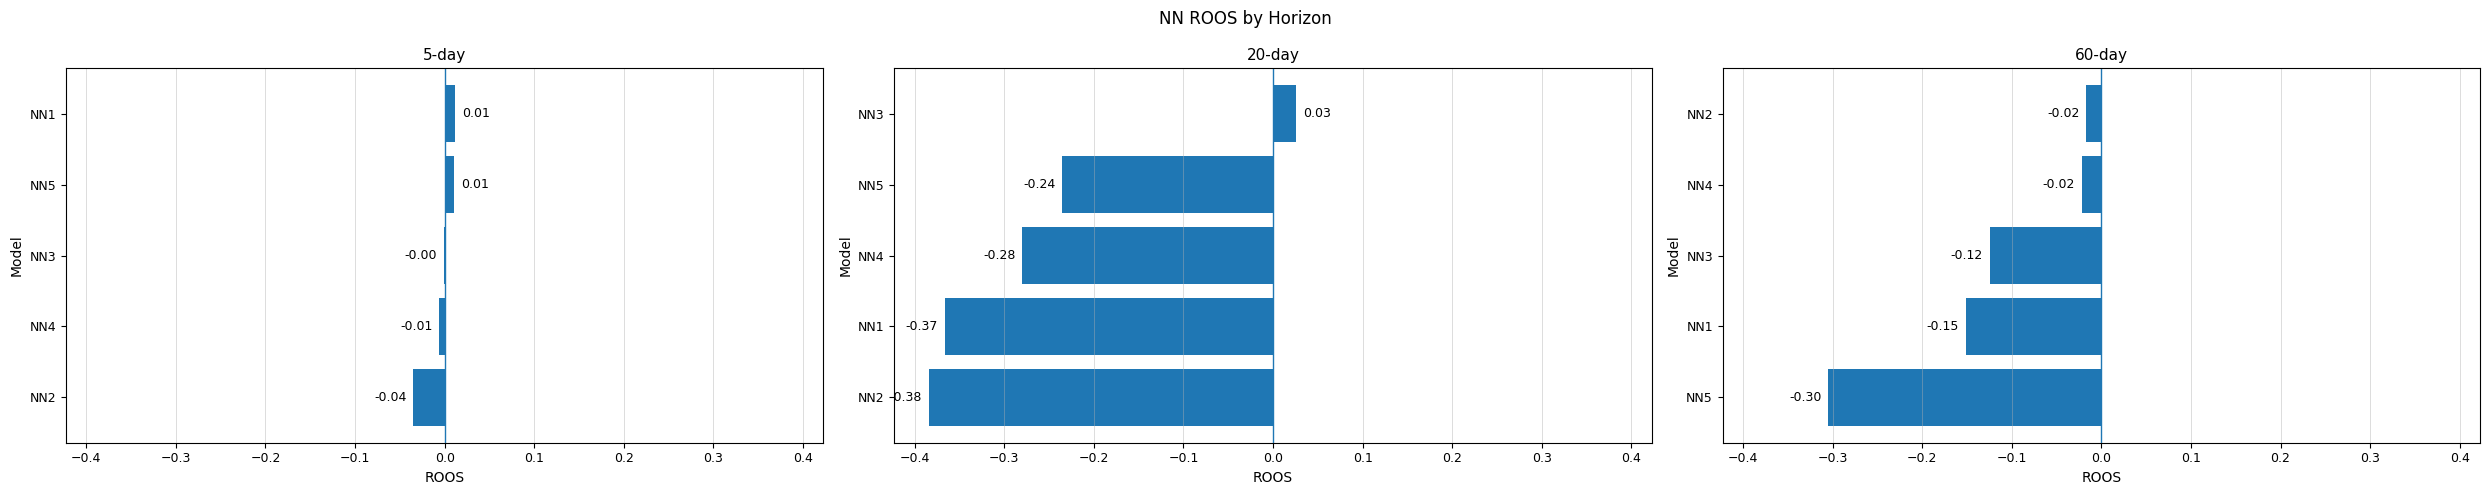

In [50]:
#plot Bar charts per time horizon
df = nn_reg_results_df.copy()
df["horizon"] = df["horizon"].astype(int)
df["ROOS"] = pd.to_numeric(df["ROOS"], errors="coerce")

horizons = [5, 20, 60]

# Global symmetric x-limits so panels are comparable
vmax = float(np.nanmax(np.abs(df["ROOS"]))) if not df["ROOS"].isna().all() else 1.0
xlim = (-1.1*vmax, 1.1*vmax)

fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharex=True)
for ax, h in zip(axes, horizons):
    df_h = (
        df.loc[df["horizon"] == h, ["model","ROOS"]]
          .sort_values("ROOS", ascending=True)   # worst→best
    )

    ax.barh(df_h["model"], df_h["ROOS"])
    ax.axvline(0, linewidth=1)
    ax.set_xlim(*xlim)
    ax.set_title(f"{h}-day", fontsize=11)
    ax.set_xlabel("ROOS", fontsize=10)
    ax.set_ylabel("Model", fontsize=10)
    ax.grid(axis="x", linewidth=0.5, alpha=0.6)
    ax.tick_params(axis="both", labelsize=9)

    # annotate values at bar ends
    for y, v in enumerate(df_h["ROOS"].values):
        if np.isnan(v):
            continue
        x_text = v + (0.02 * vmax if v >= 0 else -0.02 * vmax)
        ha = "left" if v >= 0 else "right"
        ax.text(x_text, y, f"{v:.2f}", va="center", ha=ha, fontsize=9)

fig.suptitle("NN ROOS by Horizon", fontsize=12)
plt.tight_layout()
plt.show()


After trying different NN hyperparameters (stronger L2 and smaller learning rate), we obtained the following out-of-sample ROOS:

* 5-day: NN1 = 0.0116, NN5 = 0.0109 (others near zero/negative).

* 20-day: NN3 = 0.0259 (clearly positive; others negative).

* 60-day: no model positive; best = NN2 = −0.0168.

Overall, positive ROOS appears at short (5d) and medium (20d) horizons for specific architectures, but magnitudes are small—consistent with weak predictability of return levels.

**MODEL SELECTION**

We use ROOS as our primary metric for return regression, since it directly measures forecasting skill versus a zero-return benchmark. Based on ROOS, the Neural Network with three hidden layers (NN3) at the 20-day horizon is the strongest model among those we tested (LPM/Ridge, Random Forest, and NN1–NN5).

Our feature set is quite weak—price/volume-based signals only—so absolute ROOS levels are modest and not directly comparable to Gu et al. (2020), who use a much richer cross-section of characteristics, in addition to a way higher number of stocks. Nevertheless, the pattern matches theirs: performance improves from shallow to moderately deep networks and then declines with extra depth. Thus, selecting NN3 @ 20d as the “best” model is consistent with both our evidence and the qualitative takeaway from the Gu et al. results.

## **Task 4**: Performance of the AI-driven portfolio (NN2@20 days)





In [51]:
test_df

,date,stock,price,volume,ret5,ret20,ret60,bin_5,bin_20,bin_60,ret_past_5,volchg_past_5,ret_past_20,volchg_past_20,ret_past_60,volchg_past_60
0,2018-04-17,AAPL,178.240005,26605400,-0.085839,0.046005,0.071757,0,1,1,0.028802,-0.063474,0.016771,-0.204546,-0.001233,-0.179481
1,2018-04-18,AAPL,177.839996,20754500,-0.079791,0.058142,0.075855,0,1,1,0.031315,-0.074765,0.014837,0.056241,0.004746,-0.234394
2,2018-04-19,AAPL,172.800003,34808800,-0.049653,0.082118,0.104803,0,1,1,-0.007695,0.520746,0.008933,-0.060615,-0.023949,0.064844
3,2018-04-20,AAPL,165.720001,65491100,-0.020516,0.124246,0.155262,0,1,1,-0.051565,1.606684,-0.018537,0.578449,-0.048789,0.281498
4,2018-04-23,AAPL,165.240005,36515500,0.000121,0.135500,0.152263,1,1,1,-0.060175,0.692225,0.001819,-0.110003,-0.034305,-0.120723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,2020-05-11,TSLA,811.289978,16471100,0.002884,0.159474,0.830443,1,1,1,0.065818,-0.143785,0.246317,-0.267150,0.009067,-0.373468
4196,2020-05-12,TSLA,809.409973,15906900,-0.001730,0.266416,0.840328,0,1,1,0.053631,-0.063843,0.140191,-0.479767,0.011724,0.013585
4197,2020-05-13,TSLA,790.960022,19065500,0.031101,0.229948,0.836641,1,1,1,0.010708,0.714030,0.083759,-0.191352,-0.078565,0.163829
4198,2020-05-14,TSLA,803.330017,13682200,0.030212,0.164254,0.765862,1,1,1,0.029857,0.186898,0.077991,-0.337677,-0.124360,-0.461818


In [52]:
# Ensure inputs are ready
preds_20_nn2 = nn_reg_preds[("NN2", 20)].copy()
preds_20_nn2["date"] = pd.to_datetime(preds_20_nn2["date"])
preds_20_nn2 = preds_20_nn2.sort_values(["date","stock"]).reset_index(drop=True)

# Prices panel & next-day simple returns (from t to t+1), labeled at t
px = test_df[["date","stock","price"]].copy()
px["date"] = pd.to_datetime(px["date"])
P  = px.pivot(index="date", columns="stock", values="price").sort_index()
r1 = P.pct_change().shift(-1)  # daily realized return used to compound during each 20d hold

In [53]:
import numpy as np
import pandas as pd

def portfolio_evolution(
    preds_df, r1, horizon=20, k=4, initial_capital=100.0, fees_bps=0.0
):
    col_hat = f"r_hat_{horizon}"

    # Trading days usable in both predictions and returns
    dates = np.intersect1d(r1.index.values, preds_df["date"].unique())
    dates = pd.to_datetime(dates)
    dates = np.sort(dates)

    last_start = len(dates) - horizon  # need full 20-day hold
    pv = float(initial_capital)
    prev_picks = None

    pv_by_date = {}    # date -> PV after that day's return
    blocks = []

    for i in range(0, last_start + 1, horizon):
        d0 = pd.Timestamp(dates[i])

        # Cross-section at block start
        cross = preds_df.loc[(preds_df["date"] == d0) & (~preds_df[col_hat].isna()), ["stock", col_hat]]
        if cross.empty:
            continue

        # Select top-k by predicted 20d return
        picks = cross.nlargest(k, col_hat)["stock"].tolist()
        new_set  = set(picks)
        old_set  = set(prev_picks) if prev_picks is not None else set()

        # Transaction fee: only on BUY side into newly added names
        # m = number of names present in new block but not in old block
        m_replaced = len(new_set - old_set) if prev_picks is not None else 0
        buy_weight = (m_replaced / k)  # fraction of PV we allocate into new stocks
        fee_dollar = pv * (fees_bps / 1e4) * buy_weight
        pv_before = pv
        pv -= fee_dollar  # pay fee upfront at the rebalance

        # Hold for 'horizon' days, compounding by average next-day returns of picks
        block_dates = dates[i : i + horizon]  # 't' labels for t->t+1 returns
        for d in range(horizon):
            t = pd.Timestamp(block_dates[d])
            if t not in r1.index:
                continue
            # realized next-day return of today's picks (equal-weight)
            r_next = r1.loc[t, picks]
            r_day = np.nanmean(r_next.values)
            if np.isnan(r_day):
                r_day = 0.0
            pv = pv * (1.0 + r_day)
            pv_by_date[t] = pv

        blocks.append({
            "rebalance_date": d0,
            "picks": ", ".join(picks),
            "m_replaced": int(m_replaced),
            "fee_bps": float(fees_bps),
            "fee_amount": float(fee_dollar),
            "pv_before_block": float(pv_before),
            "pv_after_block":  float(pv)
        })
        prev_picks = picks

    curve = pd.Series(pv_by_date).sort_index().rename("pv")
    blocks = pd.DataFrame(blocks)
    return curve, blocks, float(pv)

#Run: no-fee and with 3 bps (applied per new name bought at rebalance)
curve_nf, blocks_nf, final_nf = portfolio_evolution(
    preds_20_nn2, r1, horizon=20, k=4, initial_capital=100.0, fees_bps=0.0
)
curve_fee, blocks_fee, final_fee = portfolio_evolution(
    preds_20_nn2, r1, horizon=20, k=4, initial_capital=100.0, fees_bps=3.0
)

print(f"Final (block-hold 20d, no fees): ${final_nf:,.2f}")
print(f"Final (block-hold 20d, 3 bps per new name): ${final_fee:,.2f}")


Final (block-hold 20d, no fees): $97.59
Final (block-hold 20d, 3 bps per new name): $97.36


In [54]:
# Align start date for fair comparison
start_date = max(curve_nf.index.min(), curve_fee.index.min(), r1.index.min())
r1_cmp = r1.loc[r1.index >= start_date]
curve_nf  = curve_nf[curve_nf.index  >= start_date]
curve_fee = curve_fee[curve_fee.index >= start_date]


# Compute 1000 random buy&hold portfolios (static weights) and then average their perfomances average daily returns & equity
N = r1_cmp.shape[1]
rng = np.random.default_rng(42)
W = rng.dirichlet(np.ones(N), size=1000)
R_mat = r1_cmp.values @ W.T
avg_random_daily_r = pd.Series(R_mat.mean(axis=1), index=r1_cmp.index, name="avg_random_r1")
avg_random_equity = 100.0 * (1.0 + avg_random_daily_r).cumprod()
avg_random_equity.name = "Avg Random (1000) — Buy&Hold"

In [55]:
#build s&p500 hold portfolio as benchmark

#Portfolio of 100& s&500
spx = price[['Date','sp500']]
spx["Date"] = pd.to_datetime(spx["Date"])
spx = (
    spx.loc[(spx["Date"] >= "2018-04-17") & (spx["Date"] <= "2020-05-15")] #the test period
       .sort_values("Date")
       .set_index("Date")
)

# 2) compute daily simple returns (P_t / P_{t-1} - 1)
spx["r1"] = spx["sp500"].pct_change()

# 3) portfolio evolution from $100 invested on the first day (buy & hold)
spx["equity_100"] = 100.0 * (1.0 + spx["r1"].fillna(0.0)).cumprod()

#result
spx[["sp500", "r1", "equity_100"]]


/tmp/ipython-input-2887386520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx["Date"] = pd.to_datetime(spx["Date"])


,sp500,r1,equity_100
Date,,,
2018-04-17,2706.389893,NaN,100.000000
2018-04-18,2708.639893,0.000831,100.083137
2018-04-19,2693.129883,-0.005726,99.510048
2018-04-20,2670.139893,-0.008537,98.660577
2018-04-23,2670.290039,0.000056,98.666125
...,...,...,...
2020-05-11,2930.189941,0.000133,108.269320
2020-05-12,2870.120117,-0.020500,106.049765
2020-05-13,2820.000000,-0.017463,104.197847


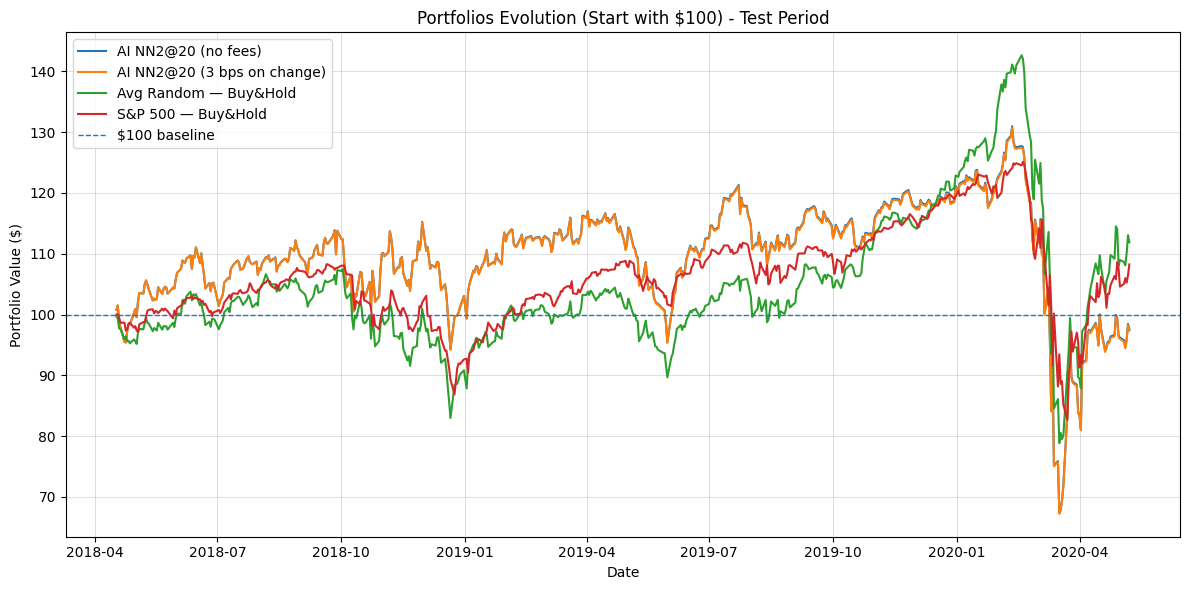

In [56]:
#plot the portfolios evolution

# Use the S&P 500 date range as the common timeline
idx_spx = spx.index

# Intersect with the other curves’ indices
common_idx = (
    idx_spx
    .intersection(curve_nf.index)
    .intersection(curve_fee.index)
    .intersection(avg_random_equity.index)
)

# Align all four curves to the common index
eq_ai_nf  = curve_nf.reindex(common_idx)
eq_ai_fee = curve_fee.reindex(common_idx)
eq_rand   = avg_random_equity.reindex(common_idx)
eq_spx    = spx.loc[common_idx, "equity_100"]  # $100 buy&hold SP500

# --- Plot the four curves ---
plt.figure(figsize=(12, 6))
plt.plot(eq_ai_nf.index,  eq_ai_nf.values,  label="AI NN2@20 (no fees)")
plt.plot(eq_ai_fee.index, eq_ai_fee.values, label="AI NN2@20 (3 bps on change)")
plt.plot(eq_rand.index,   eq_rand.values,   label="Avg Random — Buy&Hold")
plt.plot(eq_spx.index,    eq_spx.values,    label="S&P 500 — Buy&Hold")

# $100 baseline
plt.axhline(100.0, linestyle="--", linewidth=1, label="$100 baseline")

plt.title("Portfolios Evolution (Start with $100) - Test Period")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True, linewidth=0.5, alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()
plt.show()

In [57]:
print(f'Final value of the AI portfolio (no fees): ${final_nf:.2f}')
print(f'Final value of the AI portfolio (3 bps on change): ${final_fee:.2f}')
print(f'Final value of the S&P 500 portfolio: ${eq_spx.iloc[-1]:.2f}')
print(f'Final value of the random portfolio: ${eq_rand.iloc[-1]:.2f}')

Final value of the AI portfolio (no fees): $97.59
Final value of the AI portfolio (3 bps on change): $97.36
Final value of the S&P 500 portfolio: $108.25
Final value of the random portfolio: $111.89


Despite using the best NN classifier family, the NN3@20d return regressor used for ranking the top-4 fails to add value OOS in this period. That’s consistent with the small ROOS for 20-day return magnitudes: a low forecasting edge doesn’t translate into profitable top-4 selection. The test window (2018-04-17 → 2020-05-15) spans regime shifts (e.g., the COVID crash/rebound), and the model—trained on earlier years—likely overfit older regimes and overweighted high-beta names, hurting block-hold performance during drawdowns. Meanwhile, a broad buy-and-hold and even the average random mix of  the 8-stocks did better, highlighting how hard 20-day return levels are to predict from price/volume features alone. Morever, our AI protfolio is not able the beat the market, which instead shows a positive cumulative return, slighlty below the randomly built portfolios.
Lastly, the AI portfolios with and without fees are almost identical because costs are tiny and infrequent. We charge 3 bps (0.03%) only on the capital reallocated into new names at each 20-day rebalance. By considering more stocks, the fee becomes an crucial factor when rebalancing the portfolio.

To sum up and to compare our results with the Jiang et al. (2023) paper, we can say that we were not able to replicate their succesfull strategy in predicitng stock returns only through prices and volume. With CNN they are able to achieve really satisfying results: at the monthly horizon (closest to ur 20 days span) their equal-weight long–short decile spread reaches a Sharpe ratio around 2.4 with turnover ≈175%. Two of the reasons that could explain this gap are:
* **the model design** - image-based CNNs better capture volatility cues while our MLP cannot.
* **the way the portfolio is built** - we opt for a long-only strategy while in the paper they adopt long-short trading across a broad cross-section, which boosts power and risk control
